In [1]:
%matplotlib inline


# Basic Analysis Example




In [2]:
# Authors: Tamás Gál <tgal@km3net.de>, Moritz Lotze <mlotze@km3net.de>
# License: BSD-3
# Date: 2017-10-10
# Status: Under construction...
#
# sphinx_gallery_thumbnail_number = 5

In [ ]:
import sys
!{sys.executable} -m pip install km3pipe
!{sys.executable} -m pip install km3net-testdata

## Preparation
The very first thing we do is importing our libraries and setting up
the Jupyter Notebook environment.



In [3]:
import matplotlib.pyplot as plt  # our plotting module
import pandas as pd  # the main HDF5 reader
import numpy as np  # must have
import km3pipe as kp  # some KM3NeT related helper functions
import seaborn as sns  # beautiful statistical plots!
from km3net_testdata import data_path

/home/jutta/sandbox/miniconda3/envs/eschool2021/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


this is just to make our plots a bit "nicer", you can skip it



In [4]:
import km3pipe.style

km3pipe.style.use("km3pipe")

## Accessing the Data File(s)
In the following, we will work with one random simulation file with
reconstruction information from JGandalf which has been converted
from ROOT to HDF5 using the ``h5extract`` command line tool provided by
``KM3Pipe``.

You can find the documentation here:
https://km3py.pages.km3net.de/km3pipe/cmd.html#h5extract



### Note for Lyon Users
If you are working on the Lyon cluster, you just need to load the
Python module with ``module load python`` and you are all set.



### Converting from ROOT to HDF5 (if needed)

Choose a file (take e.g. one from /in2p3/km3net/mc/...),
load the appropriate Jpp/Aanet version and convert it via::

    h5extract /path/to/a/reconstructed/file.root

You can toggle a few options to include or exclude specific information.
By default, everything will be extracted but you might want to skip
Example the hit information. Have a look at ``h5extract -h``.

You might also just pick some of the already converted files from
HPSS/iRODS!



## First Look at the Data



In [5]:
filepath = data_path("hdf5/basic_analysis_sample.h5")

We can have a quick look at the file with the ``ptdump`` command
in the terminal::

    ptdump filename.h5

For further information, check out the documentation of the KM3NeT HDF5
format definition: http://km3pipe.readthedocs.io/en/latest/hdf5.html




The ``/event_info`` table contains general information about each event.
The data is a simple 2D table and each event is represented by a single row.

Let's have a look at the first few rows:



In [6]:
event_info = pd.read_hdf(filepath, "/event_info")
print(event_info.head(5))

   det_id  frame_index  livetime_sec  mc_id          mc_t  n_events_gen  \
0      -1            5             0      4  4.499995e+08      91000000   
1      -1            8             0      7  7.499997e+08      91000000   
2      -1           13             0     12  1.249999e+09      91000000   
3      -1           15             0     14  1.449999e+09      91000000   
4      -1           18             0     17  1.750000e+09      91000000   

   n_files_gen  overlays  trigger_counter  trigger_mask  utc_nanoseconds  \
0            0         0                3             6        400000000   
1            0         0                6            22        700000000   
2            0         0               11             4        200000000   
3            0         0               13            22        400000000   
4            0         0               16            22        700000000   

   utc_seconds  weight_w1     weight_w2  weight_w3  run_id  event_id  
0            0  20800

You can easily inspect the columns/fields of a ``Pandas.Dataframe`` with
the ``.dtypes`` attribute:



In [7]:
print(event_info.dtypes)

det_id               int32
frame_index         uint32
livetime_sec        uint64
mc_id                int32
mc_t               float64
n_events_gen        uint64
n_files_gen         uint64
overlays            uint32
trigger_counter     uint64
trigger_mask        uint64
utc_nanoseconds     uint64
utc_seconds         uint64
weight_w1          float64
weight_w2          float64
weight_w3          float64
run_id              uint64
event_id            uint32
dtype: object


And access the data either by the property syntax (if it's a valid Python
identifier) or the dictionary syntax, for example to access the neutrino
weights:



In [8]:
print(event_info.weight_w2)  # property syntax
print(event_info["weight_w2"])  # dictionary syntax

0       1.396000e+09
1       8.907000e+09
2       5.709000e+09
3       8.747000e+10
4       3.571000e+09
            ...     
3479    7.968000e+11
3480    1.736000e+09
3481    4.861000e+09
3482    7.043000e+10
3483    7.744000e+12
Name: weight_w2, Length: 3484, dtype: float64
0       1.396000e+09
1       8.907000e+09
2       5.709000e+09
3       8.747000e+10
4       3.571000e+09
            ...     
3479    7.968000e+11
3480    1.736000e+09
3481    4.861000e+09
3482    7.043000e+10
3483    7.744000e+12
Name: weight_w2, Length: 3484, dtype: float64


Next, we will read out the MC tracks which are stored under ``/mc_tracks``.



In [9]:
tracks = pd.read_hdf(filepath, "/mc_tracks")

It has a similar structure, but now you can have multiple rows which belong
to an event. The ``event_id`` column holds the ID of the corresponding event.



In [10]:
print(tracks.head(10))

   bjorkeny     dir_x     dir_y     dir_z   energy  id  interaction_channel  \
0  0.057346 -0.616448 -0.781017 -0.100017  4.36550   1                    4   
1  0.000000  0.488756 -0.535017 -0.689111  0.00618   1                    0   
2  0.000000 -0.656758 -0.746625 -0.105925  4.12810   2                    0   
3  0.000000  0.412029 -0.878991 -0.240015  0.96394   3                    0   
4  0.000000 -0.664951 -0.468928  0.581332  0.21791   4                    0   
5  0.437484  0.113983  0.914457  0.388298  8.09620   1                    3   
6  0.000000 -0.345462  0.923065 -0.169138  0.00632   1                    0   
7  0.000000  0.381285  0.828365  0.410406  4.41940   2                    0   
8  0.000000 -0.191181  0.907296  0.374518  3.22370   3                    0   
9  0.000000 -0.244006  0.922082  0.300377  0.90994   4                    0   

   is_cc  length   pos_x    pos_y   pos_z  time  type  event_id  
0      1     0.0  46.929   67.589 -71.802     0   -14         0 

We now are accessing the first track for each event by grouping via
``event_id`` and calling the ``first()`` method of the
``Pandas.DataFrame`` object.



In [11]:
primaries = tracks.groupby("event_id").first()

Here are the first 5 primaries:



In [12]:
print(primaries.head(5))

          bjorkeny     dir_x     dir_y     dir_z   energy  id  \
event_id                                                        
0         0.057346 -0.616448 -0.781017 -0.100017   4.3655   1   
1         0.437484  0.113983  0.914457  0.388298   8.0962   1   
2         0.549859 -0.186416 -0.385939 -0.903493   6.9806   1   
3         0.056390 -0.371672  0.550002 -0.747902  17.3370   1   
4         0.049141 -0.124809 -0.979083  0.160683   5.9697   1   

          interaction_channel  is_cc  length   pos_x    pos_y   pos_z  time  \
event_id                                                                      
0                           4      1     0.0  46.929   67.589 -71.802     0   
1                           3      1     0.0 -17.837 -109.844  30.360     0   
2                           3      1     0.0 -70.733  101.459 -30.985     0   
3                           4      1     0.0  86.852   15.056  24.474     0   
4                           1      1     0.0  46.822   88.981 -65.848 

## Creating some Fancy Graphs



Text(0.5, 1.0, 'Energy Distribution')

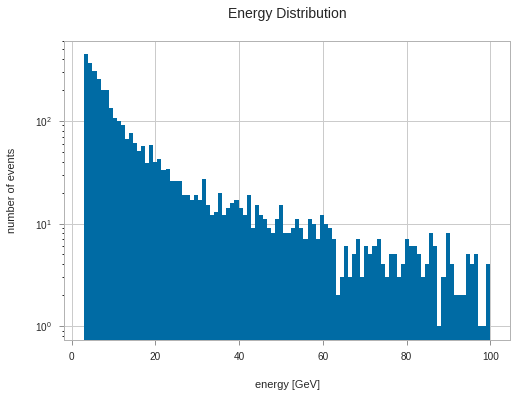

In [13]:
plt.hist(primaries.energy, bins=100, log=True)
plt.xlabel("energy [GeV]")
plt.ylabel("number of events")
plt.title("Energy Distribution")

Text(0.5, 1.0, 'bjorken-y Distribution')

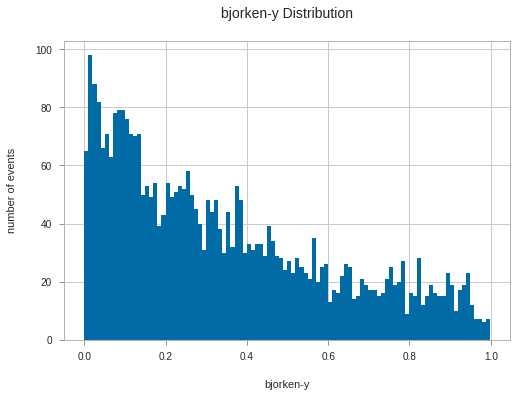

In [14]:
primaries.bjorkeny.hist(bins=100)
plt.xlabel("bjorken-y")
plt.ylabel("number of events")
plt.title("bjorken-y Distribution")

Text(0.5, 1.0, 'Zenith Distribution')

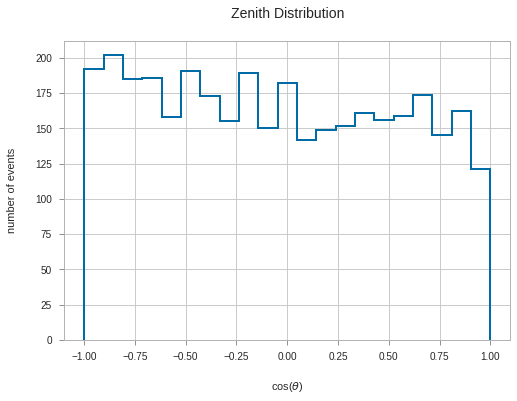

In [15]:
zeniths = kp.math.zenith(primaries.filter(regex="^dir_.?$"))
primaries["zenith"] = zeniths

plt.hist(np.cos(primaries.zenith), bins=21, histtype="step", linewidth=2)
plt.xlabel(r"cos($\theta$)")
plt.ylabel("number of events")
plt.title("Zenith Distribution")

### Starting positions of primaries



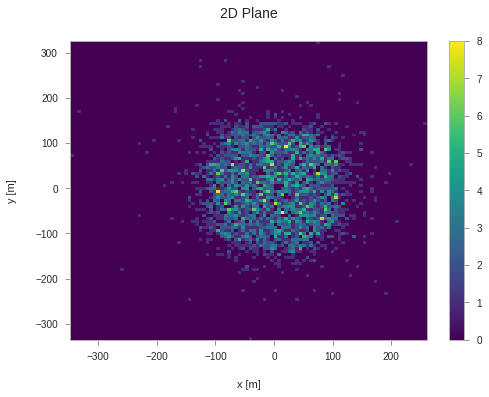

In [16]:
plt.hist2d(primaries.pos_x, primaries.pos_y, bins=100, cmap="viridis")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("2D Plane")
plt.colorbar()

If you have seaborn installed (`pip install seaborn`), you can easily create
nice jointplots:



/home/jutta/sandbox/miniconda3/envs/eschool2021/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
2021-06-16 12:18:43 jutta-ThinkPad matplotlib.legend[16454] WARNING No handles with labels found to put in legend.


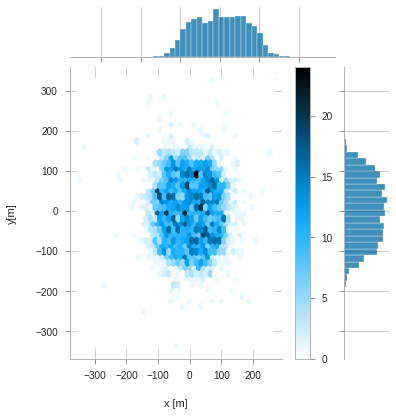

In [17]:
try:
    import seaborn as sns  # noqa

    km3pipe.style.use("km3pipe")  # reset matplotlib style
except:
    print("No seaborn found, skipping example.")
else:
    g = sns.jointplot("pos_x", "pos_y", data=primaries, kind="hex")
    g.set_axis_labels("x [m]", "y[m]")
    plt.subplots_adjust(right=0.90)  # make room for the colorbar
    plt.title("2D Plane")
    plt.colorbar()
    plt.legend()

Text(0.5, 0.92, '3D Plane')

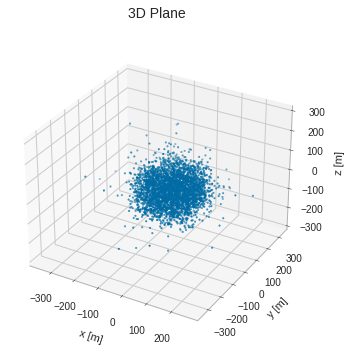

In [18]:
from mpl_toolkits.mplot3d import Axes3D  # noqa

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(primaries.pos_x, primaries.pos_y, primaries.pos_z, s=3)
ax.set_xlabel("x [m]", labelpad=10)
ax.set_ylabel("y [m]", labelpad=10)
ax.set_zlabel("z [m]", labelpad=10)
ax.set_title("3D Plane")

In [19]:
gandalfs = pd.read_hdf(filepath, "/reco/gandalf")
print(gandalfs.head(5))

      beta0     beta1        chi2     dir_x     dir_y     dir_z  jenergy_chi2  \
0  0.016788  0.011857  -53.119816 -0.877972  0.090814 -0.470018           0.0   
1  0.007835  0.005533  -32.504874  0.470130  0.786167  0.401147           0.0   
2  0.012057  0.008456  -81.195134 -0.151203 -0.769743 -0.620189           0.0   
3  0.007858  0.005554 -200.985734 -0.306306  0.545569 -0.780084           0.0   
4  0.011166  0.007366  -89.451264 -0.064503 -0.991324 -0.114522           0.0   

   jenergy_energy  jstart_length  jstart_npe_mip  ...  spread_pos_y_std  \
0             0.0      11.572860        0.000000  ...         39.561800   
1             0.0      63.148708      165.114696  ...         53.155262   
2             0.0      23.115671       62.299430  ...         35.788155   
3             0.0      55.163229       92.317612  ...         41.744175   
4             0.0     154.211642       77.005050  ...         34.385820   

   spread_pos_z_iqr  spread_pos_z_mad  spread_pos_z_mean  spre

In [20]:
gandalfs.columns

Index(['beta0', 'beta1', 'chi2', 'dir_x', 'dir_y', 'dir_z', 'jenergy_chi2',
       'jenergy_energy', 'jstart_length', 'jstart_npe_mip',
       'jstart_npe_mip_total', 'lambda', 'n_hits', 'n_iter', 'pos_x', 'pos_y',
       'pos_z', 'rec_stage', 'rec_type', 'spread_beta0_iqr',
       'spread_beta0_mad', 'spread_beta0_mean', 'spread_beta0_median',
       'spread_beta0_std', 'spread_beta1_iqr', 'spread_beta1_mad',
       'spread_beta1_mean', 'spread_beta1_median', 'spread_beta1_std',
       'spread_chi2_iqr', 'spread_chi2_mad', 'spread_chi2_mean',
       'spread_chi2_median', 'spread_chi2_std', 'spread_dir_x_iqr',
       'spread_dir_x_mad', 'spread_dir_x_mean', 'spread_dir_x_median',
       'spread_dir_x_std', 'spread_dir_y_iqr', 'spread_dir_y_mad',
       'spread_dir_y_mean', 'spread_dir_y_median', 'spread_dir_y_std',
       'spread_dir_z_iqr', 'spread_dir_z_mad', 'spread_dir_z_mean',
       'spread_dir_z_median', 'spread_dir_z_std', 'spread_jenergy_chi2_iqr',
       'spread_jenergy_chi2_

plt.hist(gandalfs['lambda'], bins=50, log=True)
plt.xlabel('lambda parameter')
plt.ylabel('count')
plt.title('Lambda Distribution of Reconstructed Events')



/home/jutta/sandbox/miniconda3/envs/eschool2021/lib/python3.9/site-packages/km3pipe/math.py:215: RuntimeWarning: invalid value encountered in true_divide
  unit = vector / np.linalg.norm(vector, axis=1, **kwargs)[:, None]


Text(0.5, 1.0, 'Zenith Reconstruction Difference')

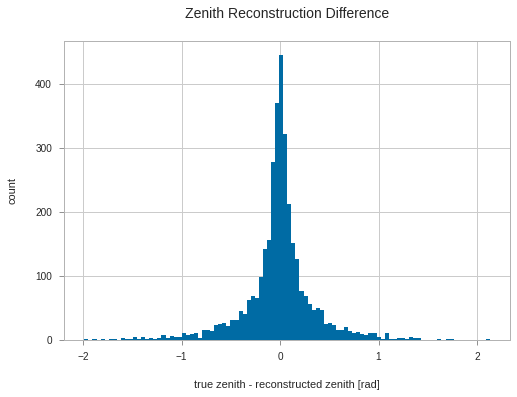

In [21]:
gandalfs["zenith"] = kp.math.zenith(gandalfs.filter(regex="^dir_.?$"))

plt.hist((gandalfs.zenith - primaries.zenith).dropna(), bins=100)
plt.xlabel(r"true zenith - reconstructed zenith [rad]")
plt.ylabel("count")
plt.title("Zenith Reconstruction Difference")

Text(0.5, 1.0, 'Zenith Reconstruction Difference for lambda < 0.2')

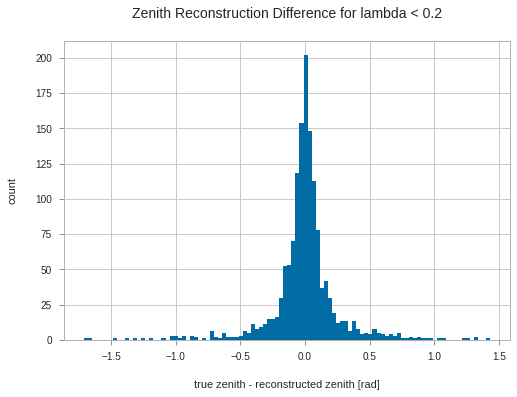

In [22]:
l = 0.2
lambda_cut = gandalfs["lambda"] < l
plt.hist((gandalfs.zenith - primaries.zenith)[lambda_cut].dropna(), bins=100)
plt.xlabel(r"true zenith - reconstructed zenith [rad]")
plt.ylabel("count")
plt.title("Zenith Reconstruction Difference for lambda < {}".format(l))

### Combined zenith reco plot for different lambda cuts



Text(0.5, 1.0, 'Zenith Reconstruction Difference for some Lambda Cuts')

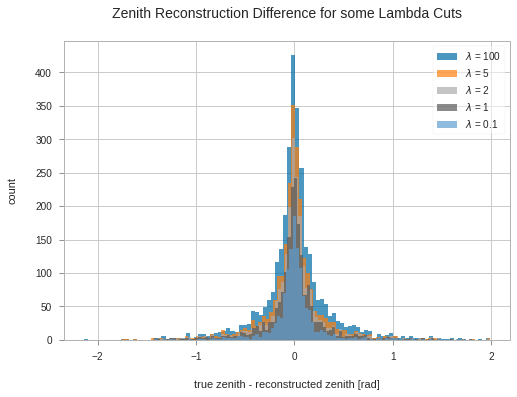

In [23]:
fig, ax = plt.subplots()
for l in [100, 5, 2, 1, 0.1]:
    l_cut = gandalfs["lambda"] < l
    ax.hist(
        (primaries.zenith - gandalfs.zenith)[l_cut].dropna(),
        bins=100,
        label=r"$\lambda$ = {}".format(l),
        alpha=0.7,
    )
plt.xlabel(r"true zenith - reconstructed zenith [rad]")
plt.ylabel("count")
plt.legend()
plt.title("Zenith Reconstruction Difference for some Lambda Cuts")

### Fitting Angular resolutions

Let's fit some distributions: gaussian + lorentz (aka norm + cauchy)

Fitting the gaussian to the whole range is a very bad fit, so
we make a second gaussian fit only to +- 10 degree.
Conversely, the Cauchy (lorentz) distribution is a near perfect fit
(note that ``2 gamma = FWHM``).



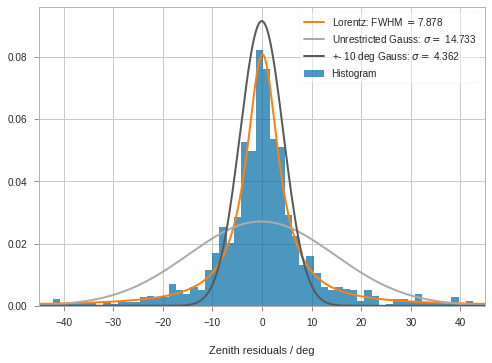

In [24]:
from scipy.stats import cauchy, norm  # noqa

residuals = gandalfs.zenith - primaries.zenith
cut = (gandalfs["lambda"] < l) & (np.abs(residuals) < 2 * np.pi)
residuals = residuals[cut]
event_info[cut]

# convert rad -> deg
residuals = residuals * 180 / np.pi

pi = 180
# x axis for plotting
x = np.linspace(-pi, pi, 1000)

c_loc, c_gamma = cauchy.fit(residuals)
fwhm = 2 * c_gamma

g_mu_bad, g_sigma_bad = norm.fit(residuals)
g_mu, g_sigma = norm.fit(residuals[np.abs(residuals) < 10])

plt.hist(residuals, bins="auto", label="Histogram", density=True, alpha=0.7)
plt.plot(
    x,
    cauchy(c_loc, c_gamma).pdf(x),
    label="Lorentz: FWHM $=${:.3f}".format(fwhm),
    linewidth=2,
)
plt.plot(
    x,
    norm(g_mu_bad, g_sigma_bad).pdf(x),
    label="Unrestricted Gauss: $\sigma =$ {:.3f}".format(g_sigma_bad),
    linewidth=2,
)
plt.plot(
    x,
    norm(g_mu, g_sigma).pdf(x),
    label="+- 10 deg Gauss: $\sigma =$ {:.3f}".format(g_sigma),
    linewidth=2,
)
plt.xlim(-pi / 4, pi / 4)
plt.xlabel("Zenith residuals / deg")
plt.legend()

We can also look at the median resolution without doing any fits.

In textbooks, this metric is also called Median Absolute Deviation.



Text(0.5, 0, 'Absolute zenith residuals / deg')

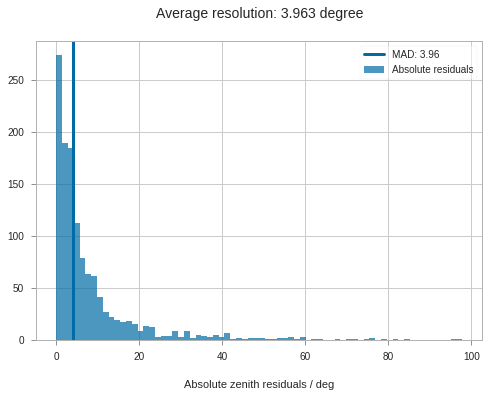

In [25]:
resid_median = np.median(residuals)
residuals_shifted_by_median = residuals - resid_median
absolute_deviation = np.abs(residuals_shifted_by_median)
resid_mad = np.median(absolute_deviation)

plt.hist(np.abs(residuals), alpha=0.7, bins="auto", label="Absolute residuals")
plt.axvline(resid_mad, label="MAD: {:.2f}".format(resid_mad), linewidth=3)
plt.title("Average resolution: {:.3f} degree".format(resid_mad))
plt.legend()
plt.xlabel("Absolute zenith residuals / deg")